<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучаем-данные" data-toc-modified-id="Изучаем-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучаем данные</a></span></li><li><span><a href="#Разделяем-датафрейм-на-обучающую,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделяем-датафрейм-на-обучающую,-валидационную-и-тестовую-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Разделяем датафрейм на обучающую, валидационную и тестовую выборки</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Аргумент-class_weight-=-'balanced'" data-toc-modified-id="Аргумент-class_weight-=-'balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Аргумент class_weight = 'balanced'</a></span></li><li><span><a href="#Масштабирование-(стандартизация)-признаков" data-toc-modified-id="Масштабирование-(стандартизация)-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Масштабирование (стандартизация) признаков</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# План работы

- Изучение данных
- Подготовка данных
- Разделение данных на обучающую и тестовые выборки
- Построение моделей с подборкой гиперпараметров
- Борьба с дисбалансом
- Тестированием модели с наилучшим результатом
- Формирование вывода

## Подготовка данных

### Изучаем данные

**Загружаем библиотеки**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

**Загружаем данные**

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В датафрейме 10000 объектов 14 признаков. Пропуски имеются в столбце `Tenure`, 9% от всего датасета.

Наша цель получить максимально достоверные предсказания, поэтому заменять значения на условные нецелесообразно. Отсутствие данных так же негативно скажется на обучении модели./

Удаляем пропуски и изменяем тип данных в столбце `Tenure`

In [6]:
df.dropna(subset = ['Tenure'], inplace=True)
df['Tenure'] = df['Tenure'].astype('int')

**Изучим баланс целевого признака:**

In [7]:
df['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

Данные не сбалансированы. Пропорции распределились `1 TP : 4 TF` (истино положительных данных к истино отрицательным).

Так же стоимт оценить степень информативности каждого признака на объектов на расчет целевого признака.
Такие признаки как `RowNumber` (номер строки), `CustomerId` (ID клиента), `Surname` (фамилия клиента) не могут оказывать влияние на уход клиента из банка. 

Исключение неинформативных признаков из обучающей выборки позволит снизить объем обрабатываемой информации моделью и увеличением качества предказаний.

**Удаляем:**

In [8]:
data = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

**В датафрейме имеются два категориальных признака `Geography` и `Gender`, которые необходимо перевести в численные прямым кодированием:**

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)

Изучение корреляции признаков:

In [10]:
print(data_ohe.corr())

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.004504 -0.000062  0.002804       0.011090   
Age                  -0.004504  1.000000 -0.013134  0.031481      -0.031877   
Tenure               -0.000062 -0.013134  1.000000 -0.007911       0.011979   
Balance               0.002804  0.031481 -0.007911  1.000000      -0.301858   
NumOfProducts         0.011090 -0.031877  0.011979 -0.301858       1.000000   
HasCrCard            -0.003937 -0.014129  0.027232 -0.019055       0.005805   
IsActiveMember        0.030947  0.082269 -0.032178 -0.003285       0.009084   
EstimatedSalary       0.005182 -0.007037  0.010520  0.014351       0.013990   
Exited               -0.023950  0.283017 -0.016761  0.117218      -0.050271   
Geography_Germany     0.000428  0.049038 -0.003299  0.401701      -0.009476   
Geography_Spain       0.001725 -0.005622  0.000810 -0.136986       0.011903   
Gender_Male          -0.008547 -0.025631  0.012634  

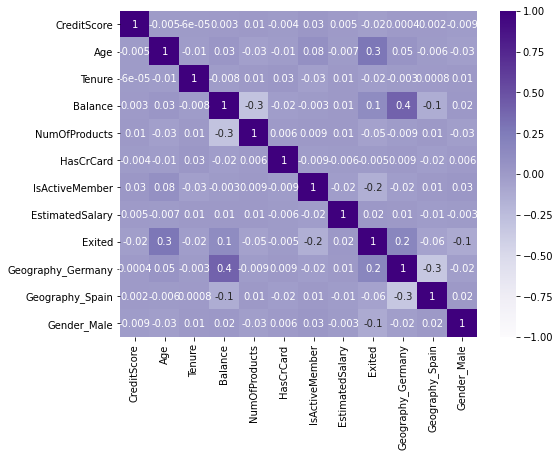

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_ohe.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'Purples', fmt='.1g');

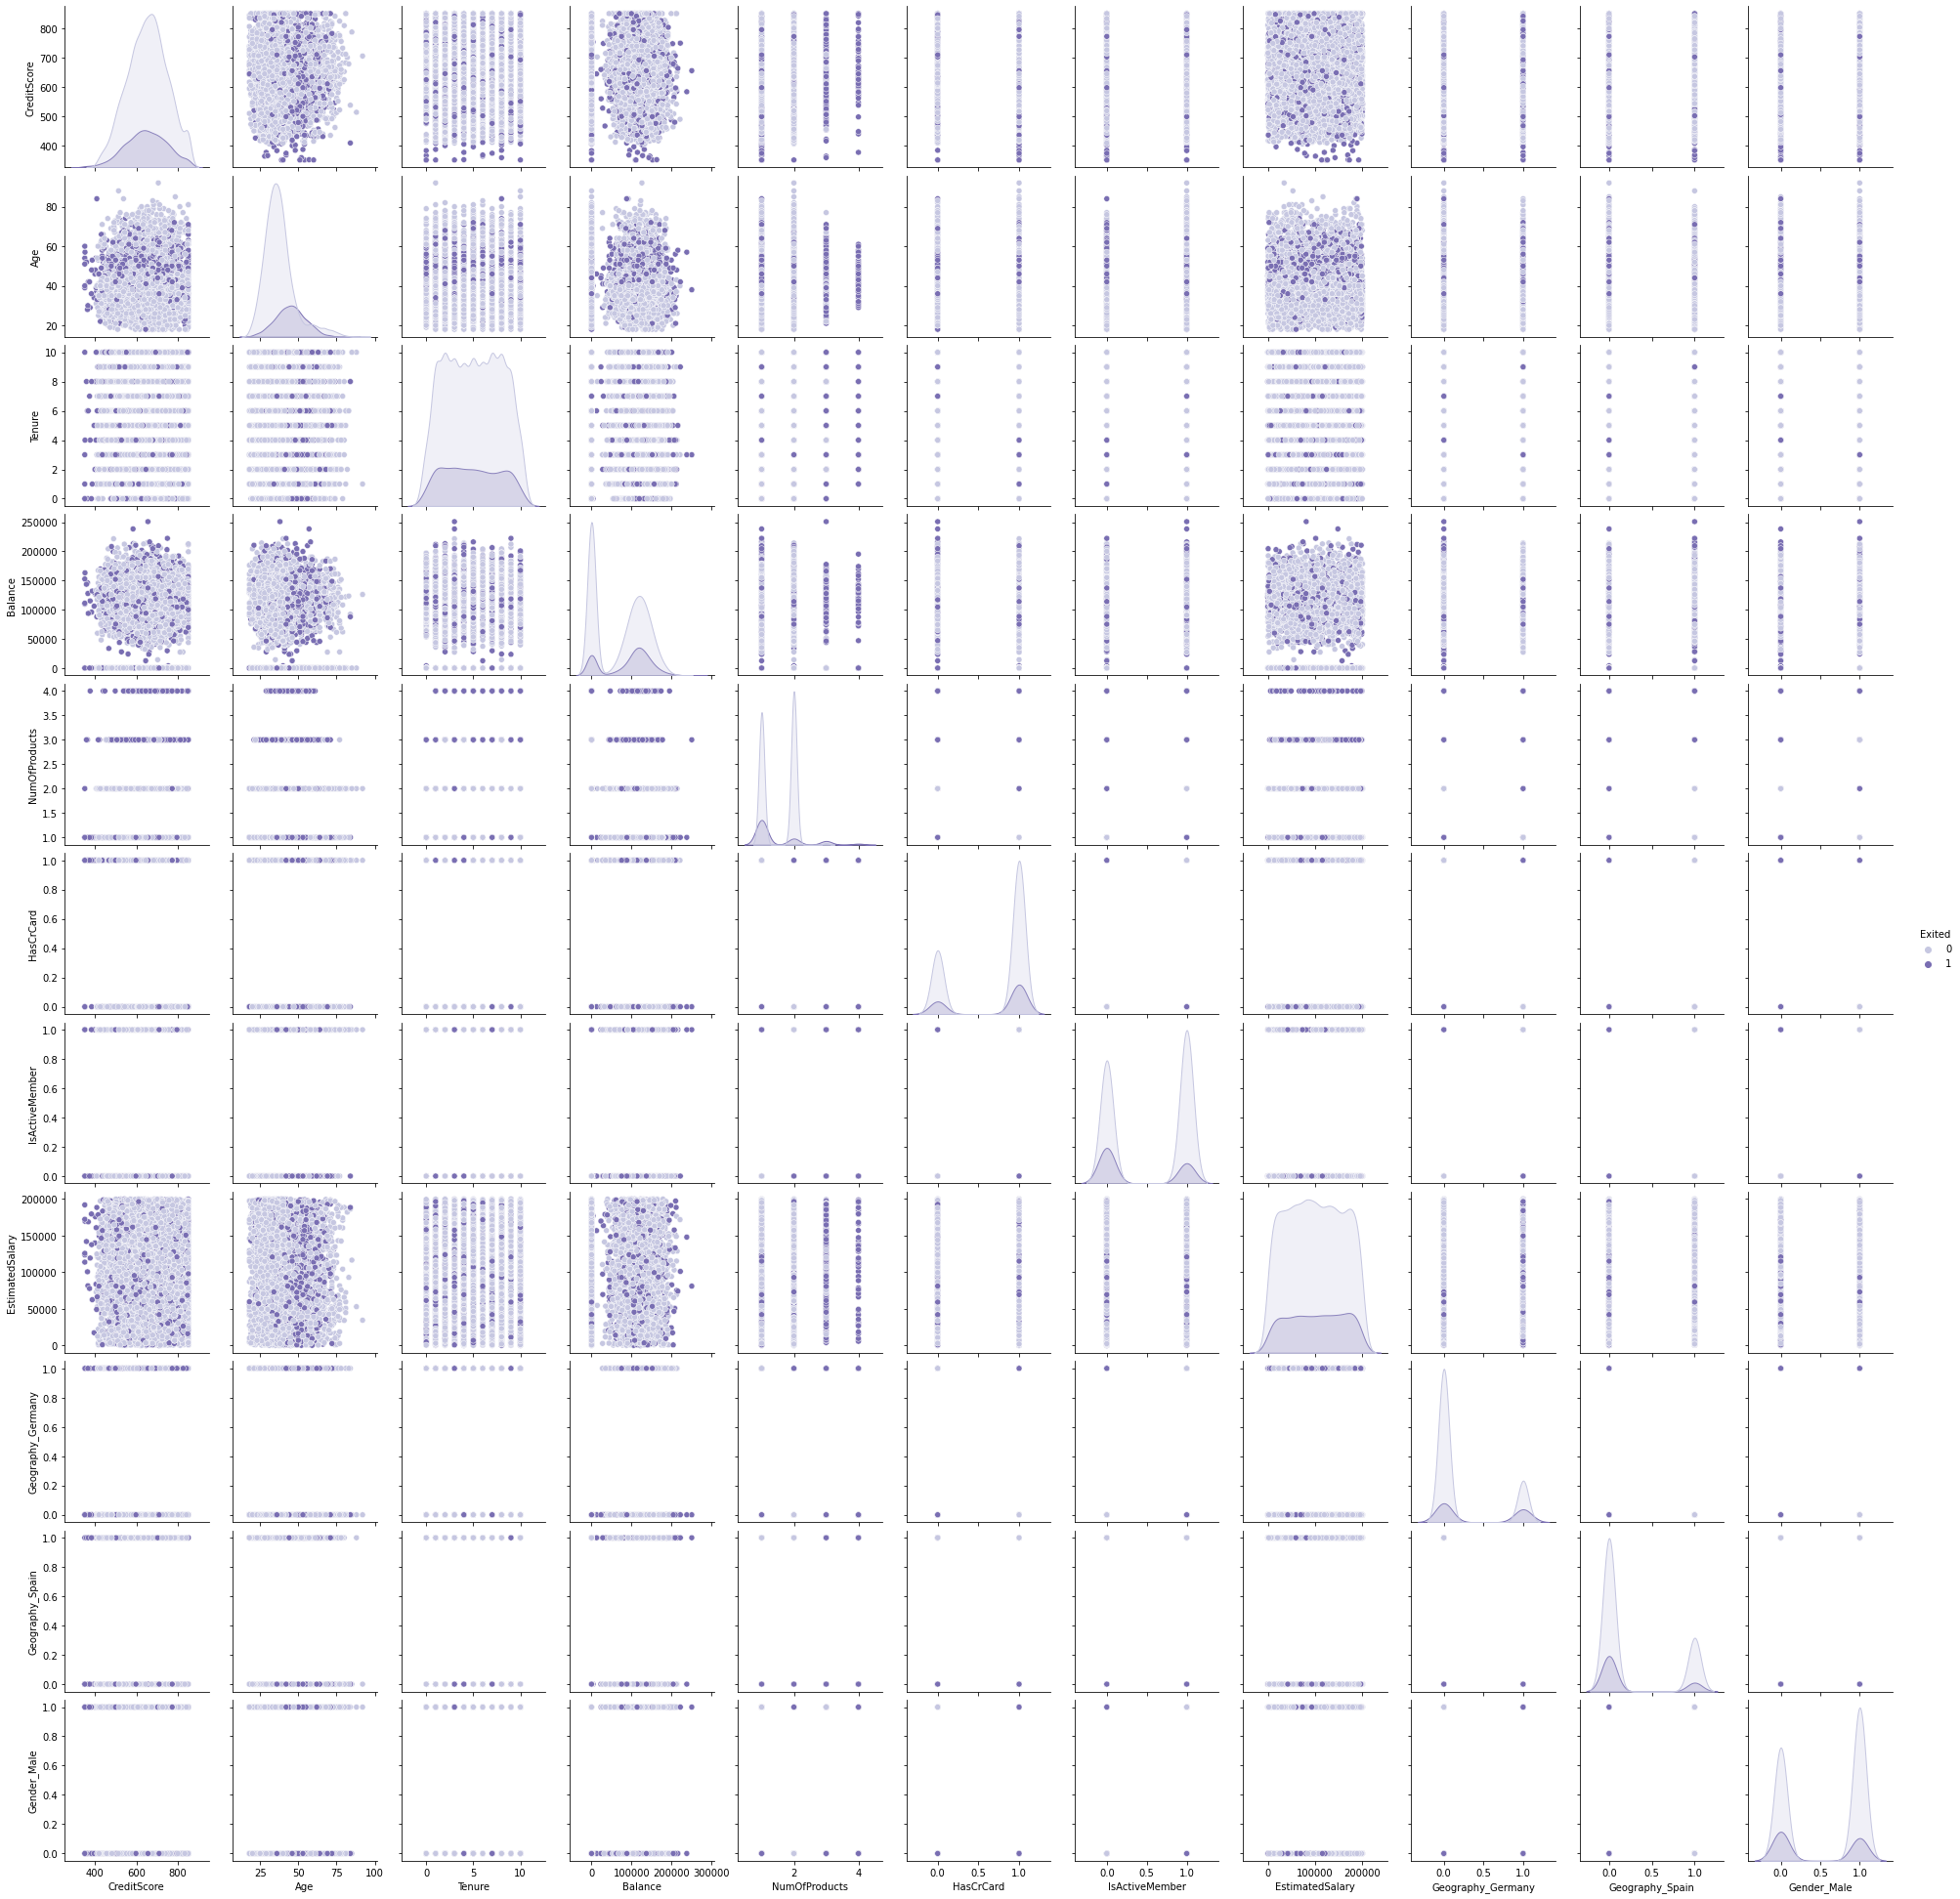

In [12]:
sns.pairplot(data_ohe, hue='Exited', palette='Purples');

Наличие мультиколлинеарности, либо высокой созависимости между признаками не установлено, удалять какой-либо признак нет необходимости.

### Разделяем датафрейм на обучающую, валидационную и тестовую выборки

Разделим датафрейм:
- 60% - обучающая выборка
- 20% - валидационная выборка
- 20% - тестовая выборка

In [13]:
df_train, df = train_test_split(data_ohe, test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df, test_size=0.5, random_state=12345)

Проверяем:

In [14]:
df_train.shape

(5454, 12)

In [15]:
df_valid.shape

(1819, 12)

In [16]:
df_test.shape

(1818, 12)

Создаем данные для обучения `features` и целевой признак `target` из обучающей выборки:

In [17]:
features = df_train.drop(['Exited'], axis=1)
target = df_train['Exited']

Создаем данные для обучения features и целевой признак target из валидационной выборки:

In [18]:
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

Создаем данные для обучения features и целевой признак target из тестовой выборки:

In [19]:
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

**Вывод**
- В датафрейме 10000 объектов 14 признаков. Пропуски имеются в столбце Tenure, 9% от всего датасета.
- Данные не сбалансированы. Пропорции распределились 1 TP : 4 TF (истино положительных данных к истино отрицательным).
- Мультиколлинеарность, либо высокая созависимость между признаками не установлена.
- Удалены признаки RowNumber (номер строки), CustomerId (ID клиента), Surname (фамилия клиента), которые не могут оказывать влияние на уход клиента из банка.
- Категориальные признаки `Geography и Gender`переведены в численные прямым кодированием.
- Датафрейм разделен на обучающую, валидационную и тестовую выборки (3:1:1)
- На каждую выборку сформированы features (признаки) и target (целевой признак)

Данные изучены, разделены и готовы к построению моделей обучения.

## Исследование задачи

Нам предстоит обучить модель бинарной классификации, определить *вероятность ухода клиента* на основании представленных признаков, поэтому будем использовать модели:
- дерево решений
- случайный лес
- логистическая регрессия

### Дерево решений

In [20]:
%%time

best = None
best_result = 0 #переменные для лучшего результата 
f1_result = [] #переменная для сохранения результатов 
depth_result = [] #переменная для сохранения показателей 
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features, target) #обучаем модель
    predictions_valid = model.predict(features_valid) #получаем предсказания
    accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
    f1 = f1_score(target_valid, predictions_valid) #проверяем F1
    print(f'max_depth = {depth} : {f1} : {accuracy}') #выводим на экран результаты
    f1_result.append(accuracy) #сохраняем результат
    depth_result.append(depth) #сохраняем показатель
    if best_result < f1: #выбираем лечшее решение
        best = depth
        best_result = f1
        best_accuracy = accuracy
print()
print(f'Наибольшее значение F1-меры {best_result} у модели с гиперпараметром max_depth= {best}')

max_depth = 1 : 0.0 : 0.8070368334249588
max_depth = 2 : 0.509274873524452 : 0.840021990104453
max_depth = 3 : 0.41290322580645167 : 0.8499175371083013
max_depth = 4 : 0.5261261261261261 : 0.8554150632215503
max_depth = 5 : 0.48192771084337344 : 0.8581638262781748
max_depth = 6 : 0.5284403669724772 : 0.8587135788894997
max_depth = 7 : 0.5534804753820034 : 0.8554150632215503
max_depth = 8 : 0.49914529914529915 : 0.8389224848818032
max_depth = 9 : 0.5202702702702702 : 0.8438702583837273
max_depth = 10 : 0.5203252032520326 : 0.8378229796591534
max_depth = 11 : 0.5337620578778135 : 0.840571742715778
max_depth = 12 : 0.4961948249619482 : 0.8180318856514568
max_depth = 13 : 0.516320474777448 : 0.8207806487080813
max_depth = 14 : 0.5052316890881914 : 0.8180318856514568
max_depth = 15 : 0.5042735042735043 : 0.8086860912589334
max_depth = 16 : 0.4885714285714286 : 0.8031885651456845
max_depth = 17 : 0.48364153627311524 : 0.80043980208906
max_depth = 18 : 0.4971751412429379 : 0.8042880703683343


Сохраняем все полученные показатели в списки для формирования итогового отчета:

In [21]:
process = []
f1_dts = []
accuracy_dts = []
auc_roc_dts = []
f1_dts.append(best_result)
accuracy_dts.append(best_accuracy)
process.append('New_model')

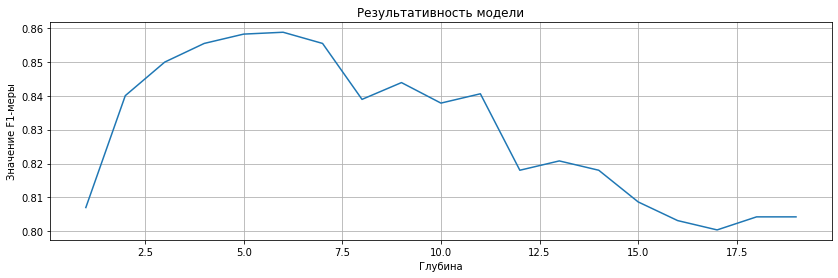

In [22]:
x = depth_result
y = f1_result
plt.figure(figsize=(14,4))
plt.plot(x, y)
plt.grid()
plt.title("Результативность модели")
plt.xlabel("Глубина")
plt.ylabel("Значение F1-меры");

Расчитываем AUC-ROC на модели с лучшими показателями:

In [23]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features, target) #обучаем модель
probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc_dts.append(auc_roc)
print(auc_roc)

0.8277837940644479


**Вывод:**

- Наибольшее значение F1-меры `0.553` (гармоничное среднее между точность и полнотой) показала модель с показателем `depth_result` равной 7
- Accuracy модели равна 85,5%. 
- AUC ROC 0.828, значит вероятность верного предсказания у модели при смене выборки высокая

### Случайный лес

In [24]:
%%time
best = None
best_result = 0 #переменные для лучшего результата 
f1_result = [] #переменная для сохранения результатов 
est_result = [] #переменная для сохранения показателей 
depth_result = []
for est in range(1, 20):
    for depth in range(1, 100, 5):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features, target) #обучаем модель
        predictions_valid = model.predict(features_valid) #получаем предсказания
        f1 = f1_score(target_valid, predictions_valid) #проверяем долю верных ответов
        accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
        print(f'n_estimators = {est} / max_depth= {depth} : {f1}/ {accuracy}') #выводим на экран результаты
        f1_result.append(f1) #сохраняем результат
        est_result.append(est) #сохраняем показатель
        depth_result.append(depth)
        if best_result < f1: #выбираем лечшее решение
            best_est = est
            best_depth = depth
            best_result = f1
            best_accuracy = accuracy
print()
print(f'Наибольшее значение F1-меры {best_result} у модели с гиперпараметрами max_depth= {best_depth} и n_estimators= {best_est}, accuracy {best_accuracy}')

n_estimators = 1 / max_depth= 1 : 0.2338308457711443/ 0.8306761957119296
n_estimators = 1 / max_depth= 6 : 0.45276292335115864/ 0.8312259483232546
n_estimators = 1 / max_depth= 11 : 0.512396694214876/ 0.8378229796591534
n_estimators = 1 / max_depth= 16 : 0.45066273932253315/ 0.7949422759758109
n_estimators = 1 / max_depth= 21 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 26 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 31 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 36 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 41 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 46 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 51 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 56 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 61 : 0.4757952973720609/ 0.7916437603078614
n_estimators = 1 / max_depth= 66 : 0.47

In [25]:
f1_rfc = []
accuracy_rfc = []
auc_roc_rfc = []
f1_rfc.append(best_result)
accuracy_rfc.append(best_accuracy)

In [26]:
df_forest = (pd.DataFrame({'f1': f1_result, 'est': est_result, 'depth': depth_result})
             .pivot_table(index='depth', columns='est', values='f1', aggfunc='sum'))

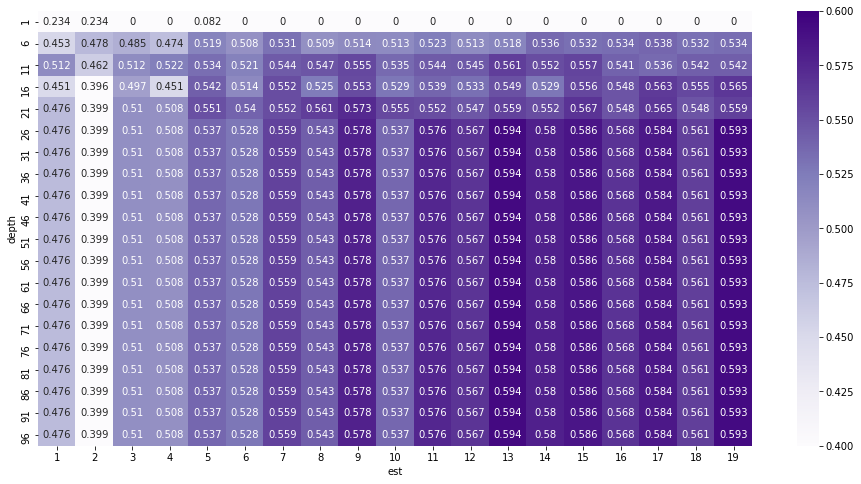

In [27]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_forest, annot=True, vmin=0.4, vmax=0.6, cmap= 'Purples', fmt='.3g');

Расчитываем AUC-ROC на модели с лучшими показателями:

In [28]:
model = RandomForestClassifier(random_state=12345, n_estimators=26, max_depth=13)
model.fit(features, target) #обучаем модель
probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc_rfc.append(auc_roc)
print(auc_roc)

0.8493279225568054


**Вывод:**
- Наибольшее значение F1-меры `0.594` показала модель с показателем n_estimators равной 13 и max_depth равной 26. 
- Accuracy модели равна 87,7%.
- AUC ROC 0.849, значит вероятность верного предсказания у модели при смене выборки высокая

### Логистическая регрессия

In [29]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features, target)
predictions_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print(f' Модель логистической регрессии на валидационной выборке: F1-мера равна {f1}, accuracy - {accuracy}')
print()
probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'AUC-ROC {auc_roc}')

 Модель логистической регрессии на валидационной выборке: F1-мера равна 0.078125, accuracy - 0.8053875755909841

AUC-ROC 0.6800072971735097
CPU times: user 62.9 ms, sys: 56.1 ms, total: 119 ms
Wall time: 101 ms


In [30]:
f1_lr = []
accuracy_lr = []
auc_roc_lr = []
f1_lr.append(f1)
accuracy_lr.append(accuracy)
auc_roc_lr.append(auc_roc)

**Вывод:**
- Accuracy модели равна 80.5%.
- AUC ROC 0.674, значит вероятность верного предсказания у модели при смене выборки высокая
- Значение F1-меры `0.073` . 

### Вывод:

При построении моделей на **несбалансированной** выборке наилучший результат F1-меры показала модель Случайного Леса (гиперпараметры - n_estimators равной 13 и max_depth равной 26):
    - Наибольшее значение F1-меры 0.594
    - Accuracy модели равна 87,7%.
    - AUC ROC 0.825

Данна модель отвечает требованиям задания и будет протестирована на тестовой выборке.

## Борьба с дисбалансом

### Аргумент class_weight = 'balanced'

Проверка моделей при сбалансировании признаков аргументом `class_weight = 'balanced'`.

Для проверки результативности метода мы будем использовать модели с гиперпараметрами, показавшими наилучшие результаты F1-меры.

In [31]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7, class_weight = 'balanced')
model.fit(features, target) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5389797882579404
Accuracy = 0.736668499175371
AUC ROC = 0.8280787861850533


In [32]:
f1_dts.append(f1)
accuracy_dts.append(accuracy)
auc_roc_dts.append(auc_roc)
process.append('Balanced')

После использования агрумента `class_weight = 'balanced'` качество модели **Дерево Решений** снизилось:
- F1-мера с 0.553 до 0.539
- Accuracy с 85,5% до 73,7%
- AUC ROC остался неизменный

In [33]:
model = RandomForestClassifier(random_state=12345, n_estimators=26, max_depth=13, class_weight = 'balanced')
model.fit(features, target) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания
f1 = f1_score(target_valid, predictions_valid) #проверяем долю верных ответов
accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5906902086677367
Accuracy = 0.8598130841121495
AUC ROC = 0.8451155515188213


In [34]:
f1_rfc.append(f1)
accuracy_rfc.append(accuracy)
auc_roc_rfc.append(auc_roc)

После использования агрумента `class_weight = 'balanced'` качество модели **Случайный Лес** снизилось незначительно:
- F1-мера с 0.594 до 0.590
- Accuracy с 87,7% до 86,0%
- AUC ROC с 0,849 до 0,845

In [35]:
model = LogisticRegression(random_state=12345, class_weight = 'balanced', solver='liblinear')
model.fit(features, target)
predictions_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)
accuracy = accuracy_score(target_valid, predictions_valid)


probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f' Модель логистической регрессии на валидационной выборке: F1-мера равна {f1}, accuracy - {accuracy}')
print(f'AUC-ROC {auc_roc}')

 Модель логистической регрессии на валидационной выборке: F1-мера равна 0.4893203883495145, accuracy - 0.7108301264431006
AUC-ROC 0.7793109605098706


In [36]:
f1_lr.append(f1)
accuracy_lr.append(accuracy)
auc_roc_lr.append(auc_roc)

После использования агрумента `class_weight = 'balanced'` качество модели **Логистическая Регрессия** изменилось:
- F1-мера увеличилась с 0,073 до 0,343
- Accuracy снизилось с 80,5% до 51,7%
- AUC ROC снизилось с 0,674 до 0,586

### Масштабирование (стандартизация) признаков

Метод StandardScaler позволяет привести все признаки к единому масштабу с целью исключения повышенного влияния при расчете целевого признака.

In [37]:
scaler = StandardScaler()
scaler.fit(features)
features_scaler = scaler.transform(features)
features_valid_scaler = scaler.transform(features_valid)

**Дерево решений**

In [38]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_scaler, target) #обучаем модель
predictions_valid = model.predict(features_valid_scaler) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid_scaler) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5534804753820034
Accuracy = 0.8554150632215503
AUC ROC = 0.8280166825807154


In [39]:
f1_dts.append(f1)
accuracy_dts.append(accuracy)
auc_roc_dts.append(auc_roc)
process.append('Scaler')

Модель Дерево Решений оказалась нечувствительной к методу StandardScaler:
- F1-мера и Accuracy не изменились
- AUC ROC увеличился с 0.827 до 0.828

**Случайный Лес**

In [40]:
model = RandomForestClassifier(random_state=12345, n_estimators=26, max_depth=13)
model.fit(features_scaler, target) #обучаем модель
predictions_valid = model.predict(features_valid_scaler) #получаем предсказания
f1 = f1_score(target_valid, predictions_valid) #проверяем долю верных ответов
accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов

probabilities_valid = model.predict_proba(features_valid_scaler) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5734513274336284
Accuracy = 0.8675096206706981
AUC ROC = 0.8486894198747059


In [41]:
f1_rfc.append(f1)
accuracy_rfc.append(accuracy)
auc_roc_rfc.append(auc_roc)

Модель Случайный Лес отозвалась на применение метода StandardScaler негативно:
- F1-мера снизилась с 0.594 до 0.573
- Accuracy снизилось с 87,7% до 86,7%
- AUC ROC не изменилась

**Логистическая Регрессия**

In [42]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_scaler, target)
predictions_valid = model.predict(features_valid_scaler)
f1 = f1_score(target_valid, predictions_valid)
accuracy = accuracy_score(target_valid, predictions_valid)


probabilities_valid = model.predict_proba(features_valid_scaler) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f' Модель логистической регрессии на валидационной выборке: F1-мера равна {f1}, accuracy - {accuracy}')
print(f'AUC-ROC {auc_roc}')

 Модель логистической регрессии на валидационной выборке: F1-мера равна 0.32119914346895073, accuracy - 0.8257284222100055
AUC-ROC 0.7809799948764526


In [43]:
f1_lr.append(f1)
accuracy_lr.append(accuracy)
auc_roc_lr.append(auc_roc)

Показатели модели Логистическая Регрессия изменилось в лучшую сторону:
- F1-мера увеличилась с 0,073 до 0,321
- Accuracy увеличилась с 80,5% до 82,6%
- AUC ROC увеличилось с 0,674 до 0,781

### Увеличение выборки

Разделяем обучающие данные по целевому признаку:

In [44]:
features_zeros = features[target == 0]
features_ones = features[target != 0]
target_zeros = target[target == 0]
target_ones = target[target != 0]

Проверяем:

In [45]:
features_zeros.shape

(4328, 11)

In [46]:
features_ones.shape

(1126, 11)

In [47]:
target_zeros.shape

(4328,)

In [48]:
target_ones.shape

(1126,)

Так как `features_ones` в 3 раза меньше `features_zeros` увеличиваем данные с нулевым целевым признаком в 3 раза для равенства:

In [49]:
features_upsampled = pd.concat([features_zeros] + [features_ones] * 3)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 3)

Перемешиваем:

In [50]:
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

**Дерево решений:**

In [51]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_upsampled, target_upsampled) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5648267008985879
Accuracy = 0.8136338647608576
AUC ROC = 0.8228300612496798


In [52]:
f1_dts.append(f1)
accuracy_dts.append(accuracy)
auc_roc_dts.append(auc_roc)
process.append('Upsampled')

После использования метода увеличения выборки, показатели качества модели Дерево Решений изменились:
- F1-мера выросла с 0.553 до 0.565
- Accuracy снизилась с 85,5% до 81,4%
- AUC ROC снизолось с 0.827 до 0.823

**Случайный Лес:**

In [53]:
model = RandomForestClassifier(random_state=12345, n_estimators=26, max_depth=13)
model.fit(features_upsampled, target_upsampled) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.6156111929307806
Accuracy = 0.8565145684442002
AUC ROC = 0.8509814310223031


In [54]:
f1_rfc.append(f1)
accuracy_rfc.append(accuracy)
auc_roc_rfc.append(auc_roc)

После использования метода увеличения выборки, показатели качества модели Случайный Лес изменились:
- F1-мера выросла с 0.594 до 0.616
- Accuracy снизилось с 87,7% до 85,7%
- AUC ROC вырос с 0,849 до 0,851

**Логистическая регрессия**

In [55]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.4246079613992763
Accuracy = 0.7377680043980209
AUC ROC = 0.7186803760373243


In [56]:
f1_lr.append(f1)
accuracy_lr.append(accuracy)
auc_roc_lr.append(auc_roc)

Показатели модели Логистическая Регрессия имеют положительный отклик:
- F1-мера увеличилась с 0,073 до 0,409
- Accuracy снизилась с 80,5% до 72,2%
- AUC ROC увеличилось с 0,674 до 0,700

### Уменьшение выборки

In [57]:
features_downsampled = pd.concat([features_zeros.sample(frac=0.3, random_state=12345)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=0.3, random_state=12345)] + [target_ones])
    
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

**Дерево решений:**

In [58]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_downsampled, target_downsampled) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5213849287169043
Accuracy = 0.7416162726772952
AUC ROC = 0.7978032790703091


In [59]:
f1_dts.append(f1)
accuracy_dts.append(accuracy)
auc_roc_dts.append(auc_roc)
process.append('Downsampled')

Данный метод отрицательно сказался на качестве модели Дерево Решений:
- F1-мера снизилась с 0.553 до 0.521
- Accuracy снизился с 85,5% до 74,2%
- AUC ROC снизился с 0.827 до 0,798

**Случайный Лес:**

In [60]:
model = RandomForestClassifier(random_state=12345, n_estimators=26, max_depth=13)
model.fit(features_downsampled, target_downsampled) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.5823068309070548
Accuracy = 0.7949422759758109
AUC ROC = 0.8459927649300947


In [61]:
f1_rfc.append(f1)
accuracy_rfc.append(accuracy)
auc_roc_rfc.append(auc_roc)

Качество предсказаний модели Случайный Лес так же ухудшилось при обучении на уменьшенной выборке, все показатели снизились:
- F1-мера с 0.594 до 0.582
- Accuracy с 87,7% до 79,5%
- AUC ROC с 0,849 до 0,845

**Логистическая регрессия**

In [62]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled) #обучаем модель
predictions_valid = model.predict(features_valid) #получаем предсказания

accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
f1 = f1_score(target_valid, predictions_valid) #проверяем F1

probabilities_valid = model.predict_proba(features_valid) # расчитываем порог классификации
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.4355179704016913
Accuracy = 0.7064321055525014
AUC ROC = 0.7212712607807975


In [63]:
f1_lr.append(f1)
accuracy_lr.append(accuracy)
auc_roc_lr.append(auc_roc)

Использование уменьшенной сбалансированной выборки отразились на показателях модели Логистическая Регрессия:
- F1-мера увеличилась с 0,073 до 0,408
- Accuracy снизилось с 80,5% до 69,0%
- AUC ROC увеличился с 0,674 до 0,702

### Вывод:

Борьба с дисбалансом:
- Проверка моделей при сбалансировании признаком аргументом `class_weight = 'balanced'`. 
        - показатели качества Дерева Решений снизились: F1-мера с 0.553 до 0.539; Accuracy с 85,5% до 73,7%; AUC ROC остался неизменный.
        - показатели качества Случайного Леса изменились незначительно: F1-мера с 0.594 до 0.590; Accuracy с 87,7% до 86,0%; AUC ROC с 0,849 до 0,845.
        - показатели модели Логистическая Регрессия изменились давольно значительо: F1-мера увеличилась с 0,073 до 0,343; Accuracy снизилось с 80,5% до 51,7%; AUC ROC снизилось с 0,674 до 0,586.
- Метод StandardScaler:
        - Модель Дерево Решений оказалась нечувствительной к данному методу: F1-мера и Accuracy не изменились, AUC ROC увеличился с 0.827 до 0.828;
        - Модель Случайный Лес отозвалась на применение метода негативно: F1-мера снизилась с 0.594 до 0.573; Accuracy снизилось с 87,7% до 86,7%; AUC ROC не изменилась;
        - Показатели модели Логистическая Регрессия изменилось в лучшую сторону: F1-мера увеличилась с 0,073 до 0,321; Accuracy увеличилась с 80,5% до 82,6%; AUC ROC увеличилось с 0,674 до 0,781.
- Метод Upsampled (увеличение выборки):
        - После использования метода увеличения выборки, показатели качества модели Дерево Решений изменились: F1-мера выросла с 0.553 до 0.565; Accuracy снизилась с 85,5% до 81,4%; AUC ROC снизолось с 0.827 до 0.823;
        - После использования метода увеличения выборки, показатели качества модели Случайный Лес изменились: F1-мера выросла с 0.594 до 0.616; Accuracy снизилось с 87,7% до 85,7%; AUC ROC вырос с 0,849 до 0,851;
        - Показатели модели Логистическая Регрессия имеют положительный отклик: F1-мера увеличилась с 0,073 до 0,409; Accuracy снизилась с 80,5% до 72,2%; AUC ROC увеличилось с 0,674 до 0,700;
- Метод Downsampled (уменьшение выборки):
        - Данный метод отрицательно сказался на качестве модели Дерево Решений: F1-мера снизилась с 0.553 до 0.521; Accuracy снизился с 85,5% до 74,2%; AUC ROC снизился с 0.827 до 0,798
        - Качество предсказаний модели Случайный Лес так же ухудшилось при обучении на уменьшенной выборке, все показатели снизились: F1-мера с 0.594 до 0.582; Accuracy с 87,7% до 79,5%; AUC ROC с 0,849 до 0,845
        - Использование уменьшенной сбалансированной выборки отразились на показателях модели Логистическая Регрессия: F1-мера увеличилась с 0,073 до 0,408; Accuracy снизилось с 80,5% до 69,0%; AUC ROC увеличился с 0,674 до 0,702

Можно сделать вывод, что нет универсального метода борьбы с дисбалансом. Каждая модель реагирует на изменение обучающей выборки индивидуально, снижая/ увеличивая все или некоторые параметры качества. Влияние методов на обучение каждой модели можно рассмотреть на графиках:

,process,f1,accuracy,auc_roc
0,New_model,0.553480,0.855415,0.827784
1,Balanced,0.538980,0.736668,0.828079
2,Scaler,0.553480,0.855415,0.828017
3,Upsampled,0.564827,0.813634,0.822830
4,Downsampled,0.521385,0.741616,0.797803


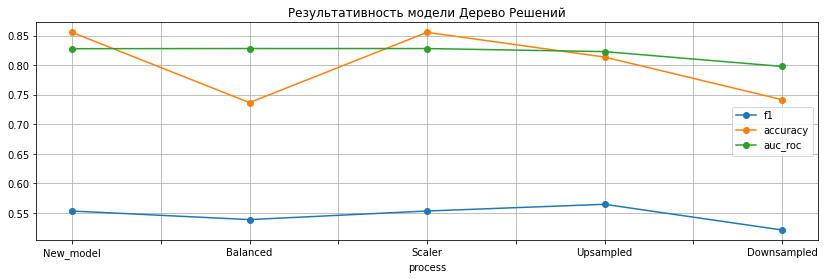

In [64]:
df_dts = pd.DataFrame({'process': process, 'f1': f1_dts, 'accuracy': accuracy_dts, 'auc_roc': auc_roc_dts})
display(df_dts)
df_dts.plot(x='process', title="Результативность модели Дерево Решений", figsize=(14,4), style = '-o', grid=True);

На графике хорошо прослеживается влияние методов борьбы с дисбалансом обучающей выборки. Модель Древа Решений негативно отозвалось на уравнение веса каждого параметра, и положительно на метод увеличения выборки.

,process,f1,accuracy,auc_roc
0,New_model,0.593960,0.866960,0.849328
1,Balanced,0.590690,0.859813,0.845116
2,Scaler,0.573451,0.867510,0.848689
3,Upsampled,0.615611,0.856515,0.850981
4,Downsampled,0.582307,0.794942,0.845993


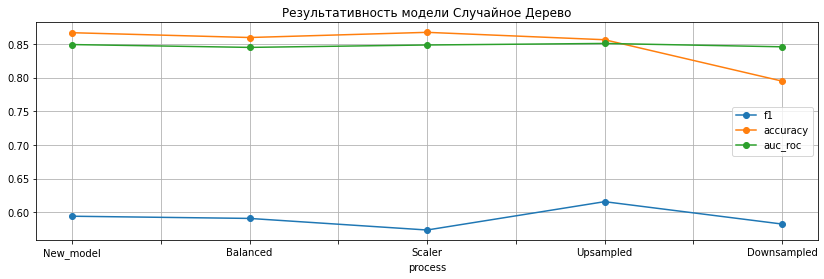

In [65]:
df_rfc = pd.DataFrame({'process': process, 'f1': f1_rfc, 'accuracy': accuracy_rfc, 'auc_roc': auc_roc_rfc})
display(df_rfc)
df_rfc.plot(x='process', title="Результативность модели Случайное Дерево", figsize=(14,4), style = '-o', grid=True);

Результативность модели Случайного Леса относительно устойчива к изменению выборки, о чем готовит высокий auc_roc. Но очень хорошие показатели, в том числе f1-мера, можно добится увеличивая выборку, а самый плохой результат - уменьшая выборку.

,process,f1,accuracy,auc_roc
0,New_model,0.078125,0.805388,0.680007
1,Balanced,0.489320,0.710830,0.779311
2,Scaler,0.321199,0.825728,0.780980
3,Upsampled,0.424608,0.737768,0.718680
4,Downsampled,0.435518,0.706432,0.721271


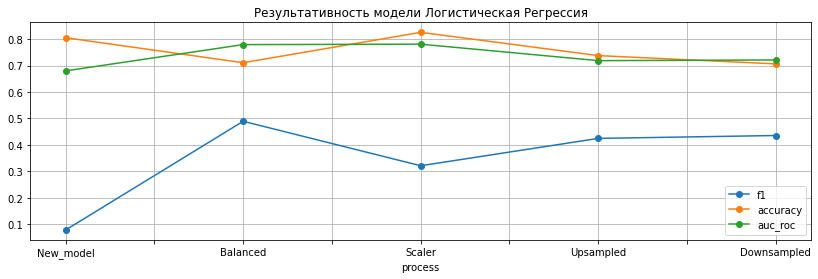

In [66]:
df_lr = pd.DataFrame({'process': process, 'f1': f1_lr, 'accuracy': accuracy_lr, 'auc_roc': auc_roc_lr})
display(df_lr)
df_lr.plot(x='process', title="Результативность модели Логистическая Регрессия", figsize=(14,4), style = '-o', grid=True);

Одна из самых чувствительных меделей - Логистическая Регрессия, имеет существенные калебания показателей при смене обучающей выборки. Стоит отметить, что каждый из используемых методов борьбы с дисбалансом существенно увеличил показатель F1. Но при уравнении веса параметров accuracy снизилась до недопустимых значений. Относительно хорошие результаты данная модель показывает при масштабировании признаков.

## Тестирование модели

В результате проведенной работы установлено, что лучшие предсказания дает модель Случайного Леса (гиперпараметры - n_estimators=13 и max_depth=26) на увеличенной выборке:
- F1-мера = 0.6156111929307806
- Accuracy = 0.8565145684442002
- AUC ROC = 0.8509814310223031

Данная модель будет использована для проверки на тестовой выборке.

Объединяем обучающую и валидационную выборку:

In [67]:
features_training = features.append(features_valid)
target_training = target.append(target_valid)

Разделяем новую обучающую выборку по целевому признаку

In [68]:
features_zeros = features_training[target_training == 0]
features_ones = features_training[target_training != 0]
target_zeros = target_training[target_training == 0]
target_ones = target_training[target_training != 0]

Проверяем

In [69]:
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(5796, 11)
(1477, 11)
(5796,)
(1477,)


Увеличиваем и перемешиваем обучающие выборки

In [70]:
features_upsampled = pd.concat([features_zeros] + [features_ones] * 3)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 3)
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

Обучаем модель и получаем предсказания на тестовой выборке

In [71]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_upsampled, target_upsampled) #обучаем модель на увеличинной выборке
predictions_test = model.predict(features_test) #получаем предсказания

accuracy = accuracy_score(target_test, predictions_test) #проверяем долю верных ответов
f1 = f1_score(target_test, predictions_test) #проверяем F1

probabilities_test = model.predict_proba(features_test) # расчитываем порог классификации
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(f'F1-мера = {f1}')
print(f'Accuracy = {accuracy}')
print(f'AUC ROC = {auc_roc}')

F1-мера = 0.6039215686274509
Accuracy = 0.8333333333333334
AUC ROC = 0.8250606987116594


Матрица ошибок

In [72]:
M_error = confusion_matrix(target_test, predictions_test)

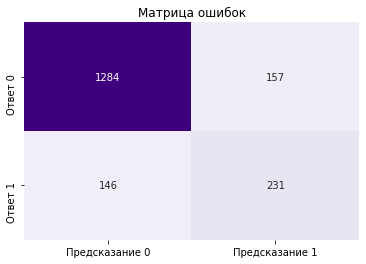

In [73]:
ax = plt.axes()
sns.heatmap(M_error, annot=True, cmap= 'Purples', yticklabels=['Ответ 0', 'Ответ 1'],
            xticklabels=['Предсказание 0', 'Предсказание 1'], cbar=False, fmt='1g', vmin=0, ax = ax)

ax.set_title('Матрица ошибок')
plt.show()

На графике наглядно видно соотношение верных и ошибочных предсказаний.

In [74]:
print(f'Значение полноты предсказаний (долю положительных среди всех ответов выделила модель)',
      recall_score(target_test, predictions_test))

Значение полноты предсказаний (долю положительных среди всех ответов выделила модель) 0.6127320954907162


In [75]:
print(f'Значение точности предсказаний (доля отрицательных ответов)',
      precision_score(target_test, predictions_test))

Значение точности предсказаний (доля отрицательных ответов) 0.595360824742268


**Вывод**

В результате нами получена модель с параметрами, которые соответствуют техническому заданию:
- F1-мера = 0.6039215686274509
- Accuracy = 0.8333333333333334
- AUC ROC = 0.8250606987116594
- recall = 0.6127320954907162
- precision = 0.595360824742268

## Вывод:

1. Раздел. Подготовка данных.
- В датафрейме 10000 объектов 14 признаков. Пропуски имеются в столбце Tenure, 9% от всего датасета.
- Данные не сбалансированы. Пропорции распределились 1 TP : 4 TF (истино положительных данных к истино отрицательным).
- Мультиколлинеарность, либо высокая созависимость между признаками не установлена.
- Удалены признаки RowNumber (номер строки), CustomerId (ID клиента), Surname (фамилия клиента), которые не могут оказывать влияние на уход клиента из банка.
- Категориальные признаки `Geography и Gender`переведены в численные прямым кодированием.
- Датафрейм разделен на обучающую, валидационную и тестовую выборки (3:1:1)
- На каждую выборку сформированы features (признаки) и target (целевой признак)

2. Раздел. Построение моделей.
- Дерево решений:
    - Наибольшее значение F1-меры `0.553` (гармоничное среднее между точность и полнотой) показала модель с показателем `depth_result` равной `7`
    - Accuracy модели равна `85,5%`. 
    - AUC ROC `0.828`, значит вероятность верного предсказания у модели при смене выборки высокая
    - Wall time: `389 ms`
- **Случайный лес показал наилучший результат**:
    - Наибольшее значение F1-меры `0.594` показала модель с показателем n_estimators равной `13` и max_depth равной `26`.
    - Accuracy модели равна `87,7%`.
    - AUC ROC `0.849`, значит вероятность верного предсказания у модели при смене выборки высокая
    - Wall time: `23 s`
    - **Данна модель отвечает требованиям задания и будет протестирована на тестовой выборке**.
- Логистическая регрессия выдала самый низкий показатель f1-меры при высоком значении Accuracy:
    - Accuracy модели равна 80.5%.
    - AUC ROC `0.674`, значит вероятность верного предсказания у модели при смене выборки высокая
    - Значение F1-меры `0.073` .

3. Борьба с дисбалансом:
    - Проверка моделей при сбалансировании признаком аргументом `class_weight = 'balanced'`. Для проверка результативности метода проведена на моделях с гиперпараметрами, показавшими наилучшие результаты F1-меры.
        - показатели качества Дерева Решений снизились: F1-мера с 0.553 до 0.539; Accuracy с 85,5% до 73,7%; AUC ROC остался неизменный.
        - показатели качества Случайного Леса изменились незначительно: F1-мера с 0.594 до 0.590; Accuracy с 87,7% до 86,0%; AUC ROC с 0,849 до 0,845.
        - показатели модели Логистическая Регрессия изменились давольно значительо: F1-мера увеличилась с 0,073 до 0,343; Accuracy снизилось с 80,5% до 51,7%; AUC ROC снизилось с 0,674 до 0,586.
    - Метод StandardScaler:
        - Модель Дерево Решений оказалась нечувствительной к данному методу: F1-мера и Accuracy не изменились, AUC ROC увеличился с 0.827 до 0.828;
        - Модель Случайный Лес отозвалась на применение метода негативно: F1-мера снизилась с 0.594 до 0.573; Accuracy снизилось с 87,7% до 86,7%; AUC ROC не изменилась;
        - Показатели модели Логистическая Регрессия изменилось в лучшую сторону: F1-мера увеличилась с 0,073 до 0,321; Accuracy увеличилась с 80,5% до 82,6%; AUC ROC увеличилось с 0,674 до 0,781.
    - Метод Upsampled (увеличение выборки):
        - После использования метода увеличения выборки, показатели качества модели Дерево Решений изменились: F1-мера выросла с 0.553 до 0.565; Accuracy снизилась с 85,5% до 81,4%; AUC ROC снизолось с 0.827 до 0.823;
        - После использования метода увеличения выборки, показатели качества модели Случайный Лес изменились: F1-мера выросла с 0.594 до 0.616; Accuracy снизилось с 87,7% до 85,7%; AUC ROC вырос с 0,849 до 0,851;
        - Показатели модели Логистическая Регрессия имеют положительный отклик: F1-мера увеличилась с 0,073 до 0,409; Accuracy снизилась с 80,5% до 72,2%; AUC ROC увеличилось с 0,674 до 0,700;
    - Метод Downsampled (уменьшение выборки):
        - Данный метод отрицательно сказался на качестве модели Дерево Решений: F1-мера снизилась с 0.553 до 0.521; Accuracy снизился с 85,5% до 74,2%; AUC ROC снизился с 0.827 до 0,798
        - Качество предсказаний модели Случайный Лес так же ухудшилось при обучении на уменьшенной выборке, все показатели снизились: F1-мера с 0.594 до 0.582; Accuracy с 87,7% до 79,5%; AUC ROC с 0,849 до 0,845
        - Использование уменьшенной сбалансированной выборки отразились на показателях модели Логистическая Регрессия: F1-мера увеличилась с 0,073 до 0,408; Accuracy снизилось с 80,5% до 69,0%; AUC ROC увеличился с 0,674 до 0,702

- Можно сделать вывод, что нет универсального метода борьбы с дисбалансом. Каждая модель реагирует на изменение обучающей выборки индивидуально, снижая/ увеличивая все или некоторые параметры качества. 
- Модель Древа Решений негативно отозвалось на уравнение веса каждого параметра, и положительно на метод увеличения выборки.
- Результативность модели Случайного Леса относительно устойчива к изменению выборки, о чем готовит высокий auc_roc. Но очень хорошие показатели, в том числе f1-мера, можно добится увеличивая выборку, а самый плохой результат - уменьшая выборку.
- Одна из самых чувствительных меделей - Логистическая Регрессия, имеет существенные калебания показателей при смене обучающей выборки. Стоит отметить, что каждый из используемых методов борьбы с дисбалансом существенно увеличил показатель F1. Но при уравнении веса параметров accuracy снизилась до недопустимых значений. Относительно хорошие результаты данная модель показывает при масштабировании признаков.

4. Тестирование модели
- В результате проведенной работы установлено, что лучшие предсказания дает модель Случайного Леса (гиперпараметры - n_estimators=13 и max_depth=26) на увеличенной выборке. Данная модель использована для проверки на тестовой выборке.

В результате нами получена модель с параметрами, которые соответствуют техническому заданию:
- F1-мера = 0.6039215686274509
- Accuracy = 0.8333333333333334
- AUC ROC = 0.8250606987116594
- recall = 0.6127320954907162
- precision = 0.595360824742268

<div style="background-color:MintCream; border:solid CadetBlue 2px; padding: 20px">
<b>Общее впечатление:</b> Классная работа. Ты хорошо постаралась! 🚀🚀<br> Все пункты задания выполнены правильно. 
 Работа отлично оформлена. Написано много хороших выводов. <br>Я написала пару замечаний, но, ничего критического не нашла. Я готова принять работу в таком виде.
Буду рада твоим вопросам  
<div>